In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'StudentsPerformance.csv'
df = pd.read_csv(file)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 1. Find out how many males and females participated in the test.

**ANS - 518 Females and 482 Males**

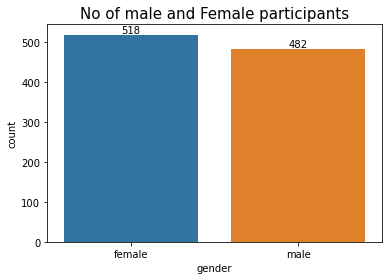

In [4]:
mvsf_plot = sns.countplot(data = df, x = 'gender')
plt.title('No of male and Female participants', fontsize = '15')
for each in mvsf_plot.containers:
    mvsf_plot.bar_label(each)

### 2. What do you think about the students' parental level of education?

Most student's parents have attended some college **(226)** or has an associate's degree **(222)** whereas only **59** student's parents have a master's qualification. Majority of parents have adequate education as per the dataset.

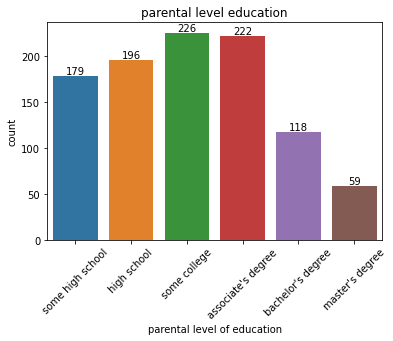

In [5]:
parentedu_plot = sns.countplot(data = df, x = 'parental level of education')
plt.title('parental level education')
for each in parentedu_plot.containers:
    parentedu_plot.bar_label(each)
    plt.xticks(rotation = 45)

### 3. Who scores the most on average for math, reading and writing based on

**● Gender** : math - male(68.82), reading - female **(72.59)** , writing - female **(72.46)** .

**● Test preparation course** : students who completed have higher average for all three scores.

In [6]:
gender_based = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_based

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [7]:
prep_based = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_based

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### 4. What do you think about the scoring variation for math, reading and writing based on

**● Gender** : in maths, male students scored more consistently **(14.55)** as the standard deviation is lower than female **(16.029)**. For the remaining tests, both scored with almost similar consistency, where male students has a slight advantage over the female.

**● Test preparation course** : In all the tests, students who completed the prep course are more consistent than students who did not complete the same.

In [8]:
gender_based_std = df.groupby('gender')[['math score', 'reading score', 'writing score']].std()
gender_based_std

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [9]:
prep_based_std = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].std()
prep_based_std

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


### 5 The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.



In [10]:
df_sorted = df.sort_values('math score', ascending = False)
df_sorted.to_csv('tempforq5.csv')

In [11]:
top25 = int(len(df)*(0.25))
bonus = list()
for i in range(0, len(df)):
    if i <= int(top25):
        bonus.append(10)
    else:
        bonus.append(0)

bonus_df = pd.DataFrame({'Bonus' :bonus})
sorted_df = pd.read_csv('tempforq5.csv')

total_df = pd.concat([sorted_df, bonus_df], axis = 1)
total_df

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus
0,999,male,group E,bachelor's degree,standard,completed,100,100,100,10
1,996,male,group A,some college,standard,completed,100,96,86,10
2,515,female,group E,some college,standard,none,100,92,97,10
3,517,female,group E,associate's degree,standard,none,100,100,100,10
4,516,female,group E,bachelor's degree,standard,none,100,100,100,10
...,...,...,...,...,...,...,...,...,...,...
995,2,female,group B,some high school,free/reduced,none,18,32,28,0
996,51,female,group C,some high school,free/reduced,none,13,41,51,0
997,3,female,group B,some college,standard,none,11,38,32,0
998,1,female,group B,high school,free/reduced,none,8,24,23,0


In [12]:
total_df.head(255)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus
0,999,male,group E,bachelor's degree,standard,completed,100,100,100,10
1,996,male,group A,some college,standard,completed,100,96,86,10
2,515,female,group E,some college,standard,none,100,92,97,10
3,517,female,group E,associate's degree,standard,none,100,100,100,10
4,516,female,group E,bachelor's degree,standard,none,100,100,100,10
...,...,...,...,...,...,...,...,...,...,...
250,851,male,group D,some college,standard,completed,77,62,62,10
251,849,male,group A,bachelor's degree,standard,none,77,67,68,0
252,850,male,group C,associate's degree,free/reduced,none,77,67,64,0
253,421,female,group C,some college,free/reduced,none,77,90,91,0
